In [1]:
import tensorflow as tf
from transformers import BertTokenizer
import tensorflow_hub as hub

In [2]:
import shutil

# Source path in Google Drive
src_folder_path = '/content/drive/MyDrive/bert_large_model/'

# Destination path in Colab runtime
dest_folder_path = '/content/'

# Copy the entire folder from Google Drive to Colab runtime
shutil.copytree(src_folder_path, dest_folder_path + 'bert_large_model/')


'/content/bert_large_model/'

In [3]:
import shutil

# Source path in Google Drive
src_folder_path = '/content/drive/MyDrive/bert_large_tokenizer/'

# Destination path in Colab runtime
dest_folder_path = '/content/'

# Copy the entire folder from Google Drive to Colab runtime
shutil.copytree(src_folder_path, dest_folder_path + 'bert_large_tokenizer/')


'/content/bert_large_tokenizer/'

In [4]:
!pip install tensorflow_text
import tensorflow_text as text  # Registers the ops.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 25.1 MB/s eta 0:00:00


In [5]:
loaded_model = tf.keras.models.load_model('/content/bert_large_model', custom_objects={'KerasLayer': hub.KerasLayer})


In [6]:
loaded_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Assistant (InputLayer)      [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_mask': (None, 128)   0         ['Assistant[0][0]']           
                             , 'input_type_ids': (None,                                           
                              128),                                                               
                              'input_word_ids': (None,                                            
                             128)}                                                                
                                                                                              

In [7]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/5_ft_dataset.csv')

In [8]:
df.sample(5)

,text,type
47837,"First, you should take the time train to get o...",biased
12270,The best workout program to lose belly fat is ...,unbiased
29835,Answer: The best way to leverage your brand on...,unbiased
9154,The different types of investments you can mak...,unbiased
34499,"How do you get the stock price of Microsoft, i...",biased


In [9]:
df.groupby('type').describe()

text                                             
          count unique                              top freq
type                                                        
biased    33143  32809                                .  317
unbiased  33143  33084  The capital of France is Paris.    6

In [10]:
df.type.value_counts()

unbiased    33143
biased      33143
Name: type, dtype: int64

In [11]:
df['type'].replace({'biased':1,'unbiased':0},inplace=True)

In [12]:
df.sample(5)

,text,type
25378,"Dear [Hiring Managers],\n\nI am writing in res...",0.0
55275,We can’t have a “what is the recommended dosag...,1.0
27205,Start by removing any residue or dried food fr...,0.0
46512,"First of all, your elderly is getting medicati...",1.0
64440,.,1.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66295 entries, 0 to 66294
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    66295 non-null  object 
 1   type    66286 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.0+ MB


In [14]:
df['type'].isnull().sum()

9

In [15]:
df = df.dropna(subset=['type'])

In [16]:

df['type'] = df['type'].astype(int)


In [17]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame with 'text' and 'type' columns
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['type'], test_size=0.2, random_state=15, stratify=df['type'])


In [18]:
x_train.head(5)

12649    I suggest you check out a few of the budget ho...
21120    One way to save money on groceries is to plan ...
58579    Party, with the US Senate, and with the House ...
43263    You should practice a lot. Read music and try ...
61107    Be clean.\n\n \t\t\t2. Don’t give a long list ...
Name: text, dtype: object

In [19]:
y_train.head(5)

12649    0
21120    0
58579    1
43263    1
61107    1
Name: type, dtype: int64

In [20]:
loaded_model.fit(x_train, y_train, epochs=15)

# Evaluate the model on the new dataset
loaded_model.evaluate(x_test, y_test)


Epoch 1/15
1658/1658 [==============================] - 590s 340ms/step - loss: 0.5327 - accuracy: 0.7406 - precision: 0.7471 - recall: 0.7275
Epoch 2/15
1658/1658 [==============================] - 562s 339ms/step - loss: 0.4819 - accuracy: 0.7774 - precision: 0.7858 - recall: 0.7628
Epoch 3/15
1658/1658 [==============================] - 560s 338ms/step - loss: 0.4670 - accuracy: 0.7834 - precision: 0.7906 - recall: 0.7710
Epoch 4/15
1658/1658 [==============================] - 561s 338ms/step - loss: 0.4603 - accuracy: 0.7881 - precision: 0.7942 - recall: 0.7776
Epoch 5/15
1658/1658 [==============================] - 559s 337ms/step - loss: 0.4617 - accuracy: 0.7872 - precision: 0.7928 - recall: 0.7776
Epoch 6/15
1658/1658 [==============================] - 559s 337ms/step - loss: 0.4589 - accuracy: 0.7887 - precision: 0.7956 - recall: 0.7769
Epoch 7/15
1658/1658 [==============================] - 559s 337ms/step - loss: 0.4599 - accuracy: 0.7876 - precision: 0.7931 - recall: 0.7783

[0.40988588333129883,
 0.8200331926345825,
 0.906028687953949,
 0.7141348719596863]

In [21]:
y_predicted = loaded_model.predict(x_test)
y_predicted = y_predicted.flatten()

415/415 [==============================] - 137s 328ms/step


In [22]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([0, 1, 0, ..., 1, 1, 1])

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm

array([[6138,  491],
       [1895, 4734]])

Text(50.722222222222214, 0.5, 'Truth')

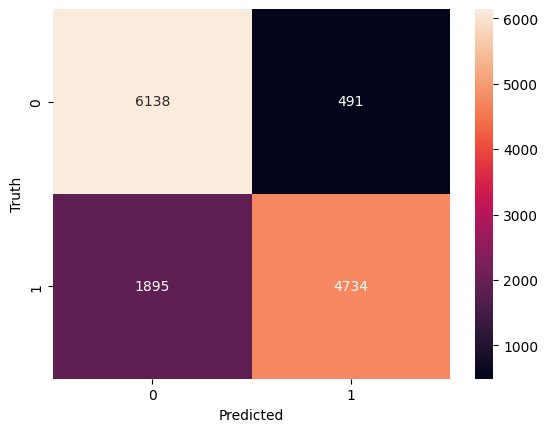

In [24]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [25]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84      6629
           1       0.91      0.71      0.80      6629

    accuracy                           0.82     13258
   macro avg       0.84      0.82      0.82     13258
weighted avg       0.84      0.82      0.82     13258



In [26]:
import tensorflow as tf
import tensorflow_hub as hub

# Save the model with custom objects
loaded_model.save('/content/fine_tuned', save_format='tf', signatures=None, options=None)

# If you want to save in HDF5 format
loaded_model.save('/content/fine_tuned.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/fine_tuned.h5', custom_objects={'KerasLayer': hub.KerasLayer})


In [29]:
reviews = [
    "The BlazingBolt phone is so fast, it will blow your mind!",
    "Drown out the world with the TranquilTunes headphones, guaranteed silence!",
    "Stay ahead of the curve with this cutting-edge product.",
    "It's crystal clear that this product outshines every rival, standing as the undisputed champion in terms of quality and performance.",
    "Compared to competitors, the FitPulse boasts a longer battery life and a wider range of health monitoring features.",
    "Based on a survey of 1,000 users, 85% reported an increase in their daily steps after using the XFit tracker for 4 weeks. The average increase was 2,000 steps per day.",
    "On average, headphones with active noise cancellation (ANC) achieve a 20-25 dB reduction in low-frequency noise, based on expert reviews. However, individual experiences may vary depending on the specific model, fit, and noise environment."]
predictions = loaded_model.predict(reviews)
print(predictions)


1/1 [==============================] - 3s 3s/step
[[0.81505245]
 [0.88160676]
 [0.73135227]
 [0.49628675]
 [0.12995179]
 [0.19700335]
 [0.11700473]]


In [27]:
loaded_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Assistant (InputLayer)      [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_mask': (None, 128)   0         ['Assistant[0][0]']           
                             , 'input_type_ids': (None,                                           
                              128),                                                               
                              'input_word_ids': (None,                                            
                             128)}                                                                
                                                                                              

In [28]:
!cp -r fine_tuned.h5 /content/drive/MyDrive
